# Nir Ben Boaz 208246090
### Readme: loads the data from rps-cv-images file
### the model has around 96.5 - 97 % accuracy
### increasing numbers of epochs from 10 to 20 didnt change the accuracy (might be worse)


In [138]:
import cv2 as cv
from tensorflow.python import keras
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

### Image normalization

In [139]:
def normalize(image_path):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Normalize pixel values to [0,1] (float)
    image = image.astype("float32") / 255.0

    return image

In [140]:
X = []
Y = []
path = "rps-cv-images"
for label,file_name in enumerate(os.listdir(path)):
    file_path = path + '/' + file_name
    print(file_path)
    for photo in os.listdir(file_path):
        photo_path = file_path + '/' + photo
        normalized_image = normalize(photo_path)
        X.append(normalized_image)
        Y.append(label)
X=np.array(X)
Y=np.array(Y)

rps-cv-images/paper
rps-cv-images/rock
rps-cv-images/scissors


In [141]:
print(X.shape)

print(Y.shape)

(2188, 200, 300, 3)
(2188,)


### Data split

In [142]:
x_train, x_test,y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

## CNN model
taken from lecture 2  time = 2:43:20 and modified to match 300x200x3 input and 3types of outputs

In [143]:
def create_CNN_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,200, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),

        layers.Dense(3, activation='softmax')   # End a softmax output over 3 classes. Pape/ Rock / Scissors
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [144]:
model = create_CNN_model()
model.fit(x_train,y_train,batch_size=32,epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test accuracy:{test_acc:.4f}")

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 615ms/step - accuracy: 0.6629 - loss: 1.0327
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 601ms/step - accuracy: 0.9131 - loss: 0.2800
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 620ms/step - accuracy: 0.9457 - loss: 0.1607
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 595ms/step - accuracy: 0.9823 - loss: 0.0547
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 575ms/step - accuracy: 0.9909 - loss: 0.0328
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 575ms/step - accuracy: 0.9983 - loss: 0.0132
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 574ms/step - accuracy: 1.0000 - loss: 0.0058
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 578ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 581ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 578ms/step - accuracy: 0.9960 - loss: 0.0133
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9726 - loss: 0.1250
test accuracy:0.9726


## misclassifed exmaples
mostly generated by chatgpt

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def show_misclassified(model, X_test, y_test, class_names, max_examples=6):
    # Predict probabilities
    preds = model.predict(X_test)
    y_pred = np.argmax(preds, axis=1)
    y_true = y_test

    # Find misclassified indices
    mis_idx = np.where(y_pred != y_true)[0]

    print(f"Found {len(mis_idx)} misclassified samples.")

    # Show only up to max_examples
    mis_idx = mis_idx[:max_examples]

    plt.figure(figsize=(12, 6))

    for i, idx in enumerate(mis_idx):
        plt.subplot(2, 3, i + 1)
        plt.imshow(X_test[idx])
        plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
Found 12 misclassified samples.


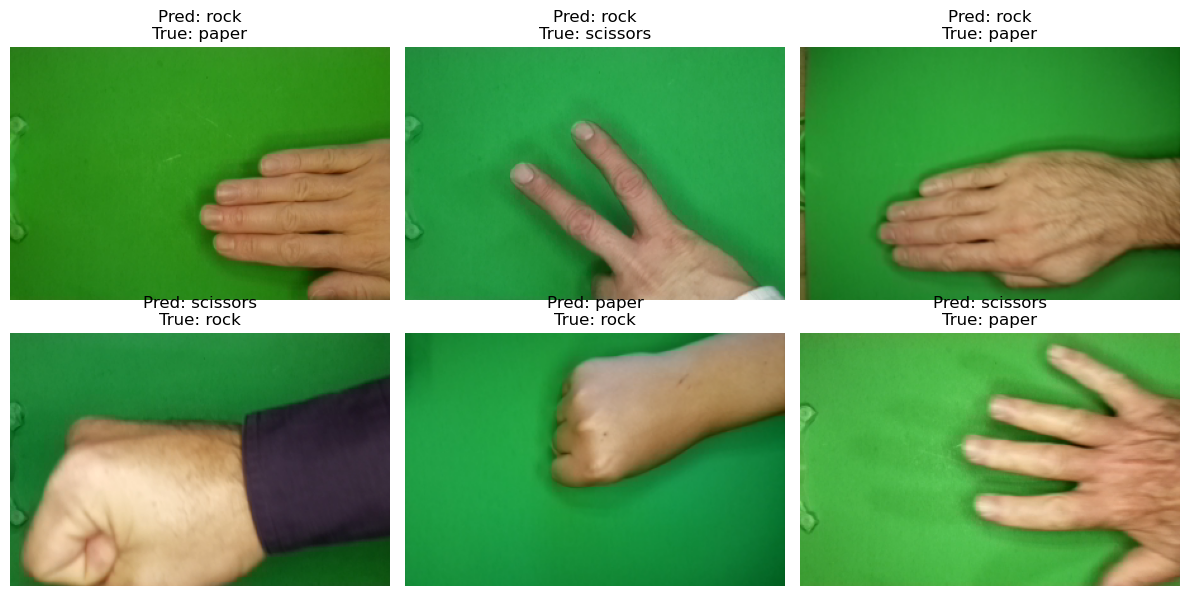

In [146]:
class_names = ["paper", "rock", "scissors"]
show_misclassified(model, x_test, y_test, class_names)


### we can see that unusual hand gestures confuses the model, like "paper" with loosely open hand, tilted hand and images with hand partially in frame